In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Attempted Multi-Linear Model for predicting 'price'

In [2]:
# Read in CSV file.
diamonds_df = pd.read_csv("data/clean_data.csv")
diamonds_df.head(10)

,id,shape,price,carat,cut,color,clarity,report,type
0,10086429,10,400,0.30,3,1,1,1,2
1,10016334,3,400,0.31,4,2,2,1,2
2,9947216,3,400,0.30,4,2,3,1,2
3,10083437,10,400,0.30,4,2,1,1,2
4,9946136,3,400,0.30,4,2,2,1,2
5,10070154,3,410,0.31,4,6,1,1,2
6,10086507,10,410,0.30,4,1,1,1,2
7,10083288,10,410,0.30,3,1,1,1,2
8,10090935,5,410,0.30,4,1,3,1,2
9,9943628,3,410,0.31,4,2,6,1,2


In [3]:
# Make 'id' the index column.
diamonds_df.set_index('id', inplace = True)
diamonds_df.head(10)

,shape,price,carat,cut,color,clarity,report,type
id,,,,,,,,
10086429,10,400,0.30,3,1,1,1,2
10016334,3,400,0.31,4,2,2,1,2
9947216,3,400,0.30,4,2,3,1,2
10083437,10,400,0.30,4,2,1,1,2
9946136,3,400,0.30,4,2,2,1,2
10070154,3,410,0.31,4,6,1,1,2
10086507,10,410,0.30,4,1,1,1,2
10083288,10,410,0.30,3,1,1,1,2
10090935,5,410,0.30,4,1,3,1,2


In [4]:
# Create our features.
X = diamonds_df.drop('price', axis =1)

# Create our target.
y = diamonds_df['price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [7]:
y_prediction = LR.predict(X_test)
y_prediction

array([-2806.73409359, 10037.87625926,   158.00945436, ...,
       -1779.12621103, -1222.0588068 ,  1632.19355164])

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_prediction)
print(score)

0.31238190440915614


# Deliverable 2

## Decided on Logistic Model for predicting 'type'

#### We decided to change our model to Logistic because our Multiple Linear model only had an accuracy score of 0.31 for predicting price.

#### The features we will be using are shape, price, carat, cut, color, clarity, and report.
##### Shape is the geometric shape of the diamond.
##### Price is the price of the diamond is U.S. dollars.
##### Carat is the measurement of the diamond's weight.
##### Cut is symmetry, facets, and reflective qualities of the diamond.
##### Color is the natural or lack of color of the diamond.
##### Clarity is the measure of purity and rarity of the diamond.
##### Report is the grading report by a gemology lab.

## Preliminary Data Pre-Processing

#### We read in 'new_clean_data.csv' and made the 'id' the index column. Then we created our feature values and target value. Feature values are described above. Our target value is 'type' ("natural" vs. "lab").

In [9]:
# Read in CSV file.
diamonds_new_df = pd.read_csv("data/new_clean_data.csv")
diamonds_new_df.head(10)

,id,shape,price,carat,cut,color,clarity,report,type
0,10086429,10,400,0.30,3,1,1,1,natural
1,10016334,3,400,0.31,4,2,2,1,natural
2,9947216,3,400,0.30,4,2,3,1,natural
3,10083437,10,400,0.30,4,2,1,1,natural
4,9946136,3,400,0.30,4,2,2,1,natural
5,10070154,3,410,0.31,4,6,1,1,natural
6,10086507,10,410,0.30,4,1,1,1,natural
7,10083288,10,410,0.30,3,1,1,1,natural
8,10090935,5,410,0.30,4,1,3,1,natural
9,9943628,3,410,0.31,4,2,6,1,natural


In [10]:
# Make 'id' the index column.
diamonds_new_df.set_index('id', inplace = True)
diamonds_new_df.head(10)

,shape,price,carat,cut,color,clarity,report,type
id,,,,,,,,
10086429,10,400,0.30,3,1,1,1,natural
10016334,3,400,0.31,4,2,2,1,natural
9947216,3,400,0.30,4,2,3,1,natural
10083437,10,400,0.30,4,2,1,1,natural
9946136,3,400,0.30,4,2,2,1,natural
10070154,3,410,0.31,4,6,1,1,natural
10086507,10,410,0.30,4,1,1,1,natural
10083288,10,410,0.30,3,1,1,1,natural
10090935,5,410,0.30,4,1,3,1,natural


In [11]:
# Create our features.
X = diamonds_new_df.drop('type', axis =1)

# Create our target.
y = diamonds_new_df['type']

In [12]:
# Variable 'type' count
y.value_counts()

natural    70313
lab        48994
Name: type, dtype: int64

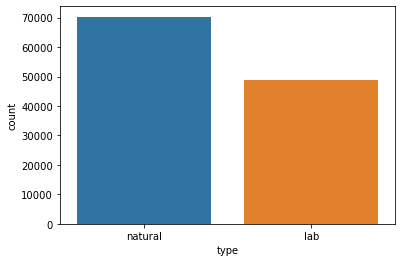

In [13]:
# Plot of natural vs. lab grown diamonds
sns.countplot(x=y, data=y)
plt.show()

In [14]:
# Statistics of feature values
X.describe()

,shape,price,carat,cut,color,clarity,report
count,119307.000000,1.193070e+05,119307.000000,119307.000000,119307.000000,119307.000000,119307.000000
mean,8.363709,3.286843e+03,0.884169,4.222384,4.530220,3.521763,1.885774
std,2.495631,9.114695e+03,0.671141,0.853234,1.887148,1.571160,1.059569
min,1.000000,2.700000e+02,0.250000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,9.000000e+02,0.400000,4.000000,3.000000,2.000000,1.000000
50%,10.000000,1.770000e+03,0.700000,4.000000,5.000000,3.000000,1.000000
75%,10.000000,3.490000e+03,1.100000,5.000000,6.000000,5.000000,3.000000
max,10.000000,1.348720e+06,15.320000,5.000000,7.000000,8.000000,4.000000


#### The dataset will be split into training an testing in supervised learning. The training dataset will be used by the model in order to learn from it. The testing dataset will be used to evaluate the model.

In [15]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [16]:
# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
   max_iter=200,
   random_state=1)

In [17]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [18]:
# Predict outcomes for test data set
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
results.head(20)

,Prediction,Actual
id,,
9899368,natural,natural
9905754,lab,lab
10013412,lab,lab
10029807,lab,lab
9989259,natural,natural
10014821,natural,natural
9989467,natural,natural
10081275,natural,natural
10057522,lab,lab


In [19]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9844436249036108


## Benefits and Limitations of Logistic Regression Model
### Benefits: A Logistic Model is easy to understand and efficient to train. It also has a good accuracy for simple data. 
### Limitations: It can only solve linear problems and predict between two outcomes. 

## Model Evaluation
### Our model has an accuracy of 0.98 which is very accurate. This is a great model to use for our live prediction.

In [20]:
from pickle import dump, load
dump(classifier, open('classifier.pkl', 'wb'))

In [21]:
# Load the model.
loaded_classifier = load(open('classifier.pkl', 'rb'))
# Predict outcomes for test data set
y_pred = loaded_classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test})
results.head(20)

,Prediction,Actual
id,,
9899368,natural,natural
9905754,lab,lab
10013412,lab,lab
10029807,lab,lab
9989259,natural,natural
10014821,natural,natural
9989467,natural,natural
10081275,natural,natural
10057522,lab,lab


In [22]:
X_test

,shape,price,carat,cut,color,clarity,report
id,,,,,,,
9899368,10,790,0.30,5,7,2,1
9905754,10,360,0.30,3,6,5,3
10013412,10,1760,1.11,4,2,4,3
10029807,7,400,0.42,5,4,2,3
9989259,10,14450,1.51,5,4,4,1
...,...,...,...,...,...,...,...
10062751,10,2190,0.50,4,6,3,1
9890027,10,1390,1.10,4,3,1,2
9804273,10,5350,1.15,5,1,4,1


In [23]:
import json
args_from_json = json.loads('{"shape": 10, "cut": 1, "color": 1, "clarity": 1, "carat": 0.3, "price": 400, "report": 1}')
print(args_from_json)

{'shape': 10, 'cut': 1, 'color': 1, 'clarity': 1, 'carat': 0.3, 'price': 400, 'report': 1}


In [24]:
#df = pd.DataFrame(args_from_json["shape"])
shape = args_from_json["shape"]
print(shape)

10


In [25]:
row = [
    args_from_json["shape"],
    args_from_json["price"],
    args_from_json["carat"],
    args_from_json["cut"],
    args_from_json["color"],
    args_from_json["clarity"],
    args_from_json["report"]
]
matrix = [row]
loaded_classifier.predict(matrix)[0]

'natural'